In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./../outputs/data/aStar.csv')
df1 = pd.read_csv('./../outputs/data/basicOnOff.csv')
df2 = pd.read_csv('./../outputs/data/deadzoneOnOff.csv')
df3 = pd.read_csv('./../outputs/data/hysteresisOnOff.csv')
df4 = pd.read_csv('./../outputs/data/hpa.csv')

In [5]:
def generate_line_chart(data, algorithm_name):
    plt.figure(figsize=(10, 6))  
    sns.lineplot(data=data)
    plt.title(f'Line Chart for {algorithm_name}')
    plt.xlabel('Index')  
    plt.ylabel('Arrival rate')
    plt.show()

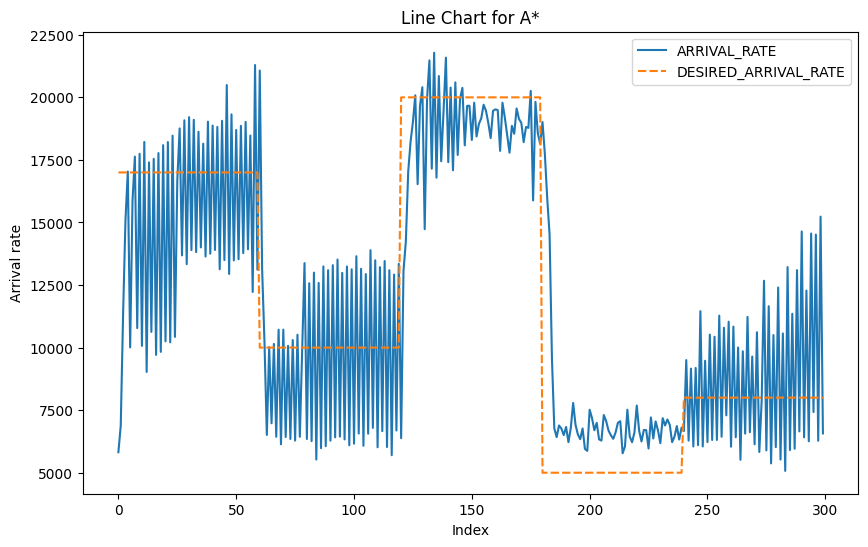

In [6]:
generate_line_chart(df[['ARRIVAL_RATE', 'DESIRED_ARRIVAL_RATE']], 'A*')

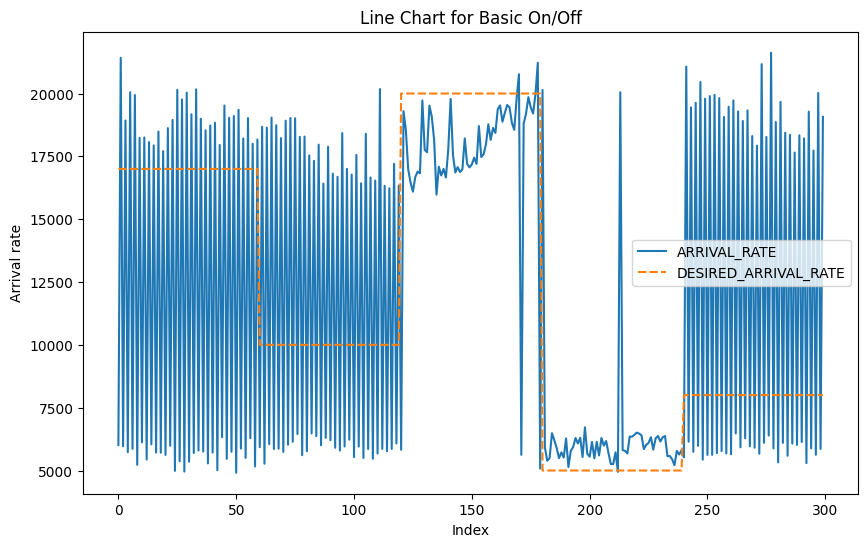

In [7]:
generate_line_chart(df1[['ARRIVAL_RATE', 'DESIRED_ARRIVAL_RATE']], 'Basic On/Off')

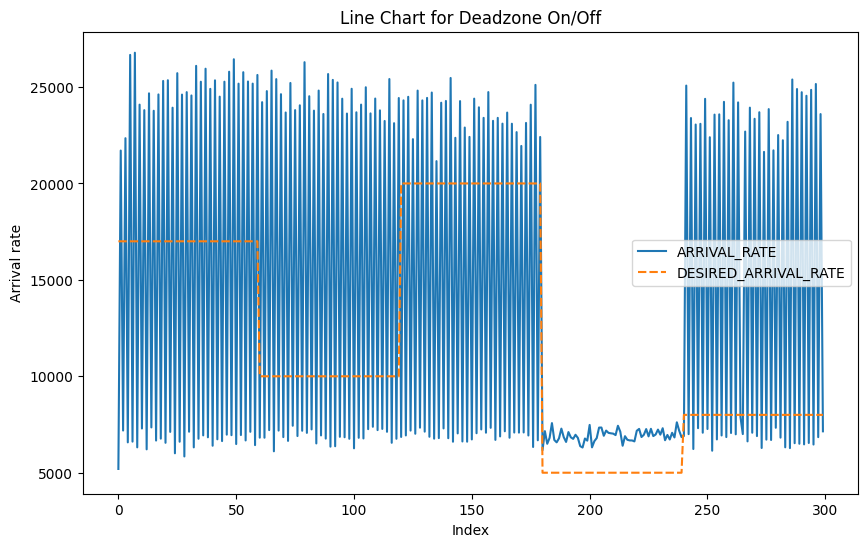

In [8]:
generate_line_chart(df2[['ARRIVAL_RATE', 'DESIRED_ARRIVAL_RATE']], 'Deadzone On/Off')

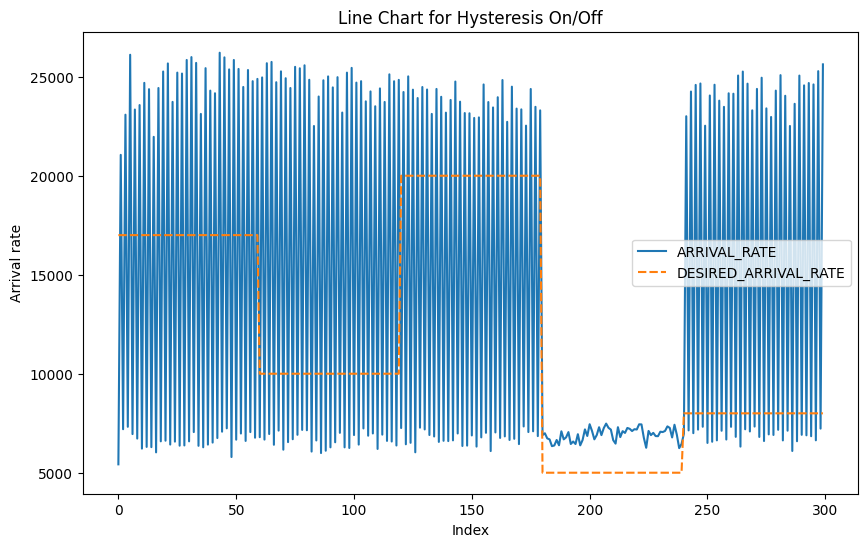

In [9]:
generate_line_chart(df3[['ARRIVAL_RATE', 'DESIRED_ARRIVAL_RATE']], 'Hysteresis On/Off')

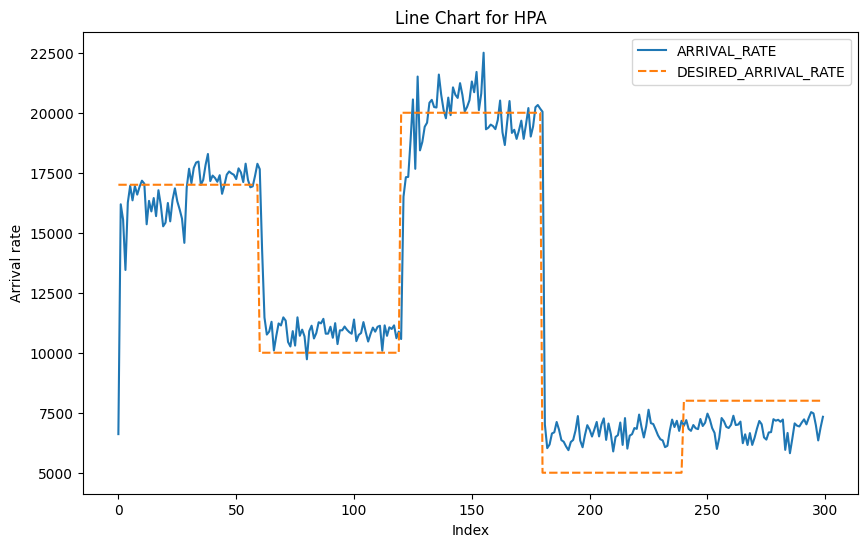

In [10]:
generate_line_chart(df4[['ARRIVAL_RATE', 'DESIRED_ARRIVAL_RATE']], 'HPA')